<a href="https://colab.research.google.com/github/Guanyu-on-motor/Collart/blob/main/Create_your_art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Creating your own art!**

---
How it works?


1.   Takes a prompt from you
2.   Runs sentiment analysis to identify predominant emotions
3.   Takes the emotions and inputs them into a pre-trained machine-learning model
4.   Model will output the colour and artstyle of your painting based on the observed emotions
5. NLP to parse prompt into series of unique words
6. The **colour**, **artstyle**, **unique words** are then sent to a GAN-based AI art generator to produce your artwork. The AI generator is taken from https://is.gd/artmachine

Note: The AI art generator might take anywhere between 20min to 3 hours





In [1]:
#@title Lets go! { run: "auto", display-mode: "form" }

#@markdown ↓ Just key in a short statement/rant (in English) below and the program will output an artwork for you!! { run: "auto", display-mode: "form" }

Post = "There is a rainbow in the sky. I think it is gonna be a good day !" #@param {type:"string"}



In [2]:
#@title Importing libraries and models { display-mode: "form" }
#@markdown This will take some time... 

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
!pip install text2emotion
import text2emotion as te
import pandas as pd
import numpy as np
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
import re
from nltk.probability import FreqDist
!pip install scikit-learn==0.23.2
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import svm
!pip install joblib==0.17
import joblib
!wget 'https://github.com/Guanyu-on-motor/Collart/blob/main/KNN_art.pkl?raw=true'
!wget 'https://github.com/Guanyu-on-motor/Collart/blob/main/SVC_colour.pkl?raw=true'


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
     |████████████████████████████████| 301 kB 5.3 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1


--2021-10-24 04:09:10--  https://github.com/Guanyu-on-motor/Collart/blob/main/KNN_art.pkl?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Guanyu-on-motor/Collart/raw/main/KNN_art.pkl [following]
--2021-10-24 04:09:10--  https://github.com/Guanyu-on-motor/Collart/raw/main/KNN_art.pkl
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Guanyu-on-motor/Collart/main/KNN_art.pkl [following]
--2021-10-24 04:09:10--  https://raw.githubusercontent.com/Guanyu-on-motor/Collart/main/KNN_art.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response.

In [3]:
#@title Getting the sentiments...{ display-mode: "form" }

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)['compound']
    return score

def emotion(sentence):
    return te.get_emotion(sentence)

score = sentiment_analyzer_scores(Post)
emotion = emotion(Post)

emotion_np=np.array([score,emotion['Happy'],emotion['Angry'],emotion['Surprise'],emotion['Sad'],emotion['Fear']])

if score<-0.5:
  print('Wah! Why so serious?')
elif score<0:
  print ('Hmmm, you seem to be in a bad mood')
elif score <0.5:
  print('You seem to be in a good mood! :)')
else:
  print('Dey! You are high af')


You seem to be in a good mood! :)


In [4]:
#@title Which art form suits you?{ display-mode: "form" }
#@markdown Let me think ah....
art_dict={0:'minimalist',
          1:'van gogh',
          2:'leonardo da vinci',
          3:'picasso',
          4:'andy warhol',
          5:'unreal engine',
          6:'cubism'}

colour_dict={0:'red',
             1:'purple',
             2:'white',
             3:'yellow',
             4:'green',
             5:'blue',
             6:'dark',
             7:'orange',
             8:'grey'}

art_model=joblib.load('/content/KNN_art.pkl?raw=true')
colour_model=joblib.load('/content/SVC_colour.pkl?raw=true')

artstyle=art_dict[int(art_model.predict(emotion_np.reshape(1,-1))[0])]
colour=colour_dict[int(colour_model.predict(emotion_np.reshape(1,-1))[0])]

print(f'I think it should be a {colour} painting in {artstyle} style')

I think it should be a yellow painting in picasso style


In [5]:
#@title Setting the parameters{ display-mode: "form" }
#@markdown 

def preprocess(text):
    new_text = re.sub('<.*?>', '', text)   # remove HTML tags
    new_text = re.sub(r'[^\w\s]', '', new_text) # remove punc.
    new_text = re.sub(r'\d+','',new_text)# remove numbers
    new_text = new_text.lower() # lower case, .upper() for upper          
    return new_text

snowball = SnowballStemmer(language = 'english')
lemmatizer = WordNetLemmatizer()

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_words=['im','hi','also','like','one','would','get','anyone','group','hello','thanks','please',
           'thats','still','really','theres']
stop_words.extend(new_words)

Post=preprocess(Post)
Post=lemmatizer.lemmatize(Post)
Post=word_tokenize(Post)

list_of_words=[]
for word in Post:
    if word not in stop_words and len(word)>3:
        list_of_words.append(word)
fdist = FreqDist(list_of_words)
most_occur=fdist.most_common(5)

def to_prompt(word_list):
  str=''
  for entry in word_list:
    str+=entry[0]+' '
  return str

p=f'{colour} painting of {to_prompt(most_occur)}in {artstyle} style'
image_size=200
download_after_finishing = False
total_steps = 200
steps_per_image = 200
flavor = 'cumin'
style_url = ""
weirdness = 2
seed = 42

# Okay here comes the art

In [6]:
#@title AI art machine: the magic begins { display-mode: "form" }
#@markdown Paiseh ah, this section gonna take very long. **This section is not written by me!** I not so zai. Please go over to https://colab.research.google.com/drive/1n_xrgKDlGQcCF6O-eL3NOd_x4NSqAUjK#scrollTo=EXMSuW2EQWsd. Thank you Hillel Wayne for your code.

import argparse
args = argparse.Namespace(
    prompts=p.split("|"),
    image_prompts=[],
    noise_prompt_seeds=[],
    noise_prompt_weights=[],
    tv_weight=0.1,
    step_size=0.05*(weirdness if weirdness != 11 else 22),
    weight_decay=0.,
    cutn=64,
    cut_pow=1.,
    display_freq=steps_per_image,
    total_iterations=total_steps,
    seed=seed,
)
if style_url:
  args.image_prompts = [style_url]

In [7]:
#@title Downloading more packages... { display-mode: "form" }
%%capture
%%bash

pip install ftfy regex tqdm omegaconf pytorch-lightning imageio-ffmpeg einops kornia transformers taming-transformers git+https://github.com/openai/CLIP.git
curl -C - -o vqgan_imagenet_f16_1024.yaml -L 'https://heibox.uni-heidelberg.de/d/8088892a516d4e3baf92/files/?p=%2Fconfigs%2Fmodel.yaml&dl=1' 
curl -C - -o vqgan_imagenet_f16_1024.ckpt -L 'https://heibox.uni-heidelberg.de/d/8088892a516d4e3baf92/files/?p=%2Fckpts%2Flast.ckpt&dl=1'


In [8]:
#@title Algorithm running... (by Hillel Wayne) { display-mode: "form" }
import math
import io
from pathlib import Path
import sys
import time

from IPython import display
from omegaconf import OmegaConf
from PIL import Image
import requests
from taming.models import cond_transformer, vqgan
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import transforms
from torchvision.transforms import functional as TF
from tqdm.notebook import tqdm, trange
import kornia.augmentation as K


import warnings
warnings.simplefilter("ignore") # Avoid spookin people for Cumin

from clip import clip
def sinc(x):
    return torch.where(x != 0, torch.sin(math.pi * x) / (math.pi * x), x.new_ones([]))


def lanczos(x, a):
    cond = torch.logical_and(-a < x, x < a)
    out = torch.where(cond, sinc(x) * sinc(x/a), x.new_zeros([]))
    return out / out.sum()


def ramp(ratio, width):
    n = math.ceil(width / ratio + 1)
    out = torch.empty([n])
    cur = 0
    for i in range(out.shape[0]):
        out[i] = cur
        cur += ratio
    return torch.cat([-out[1:].flip([0]), out])[1:-1]


def resample(input, size, align_corners=True):
    n, c, h, w = input.shape
    dh, dw = size

    input = input.view([n * c, 1, h, w])

    if dh < h:
        kernel_h = lanczos(ramp(dh / h, 2), 2).to(input.device, input.dtype)
        pad_h = (kernel_h.shape[0] - 1) // 2
        input = F.pad(input, (0, 0, pad_h, pad_h), 'reflect')
        input = F.conv2d(input, kernel_h[None, None, :, None])

    if dw < w:
        kernel_w = lanczos(ramp(dw / w, 2), 2).to(input.device, input.dtype)
        pad_w = (kernel_w.shape[0] - 1) // 2
        input = F.pad(input, (pad_w, pad_w, 0, 0), 'reflect')
        input = F.conv2d(input, kernel_w[None, None, None, :])

    input = input.view([n, c, h, w])
    return F.interpolate(input, size, mode='bicubic', align_corners=align_corners)

def vector_quantize(x, codebook):
    d = x.pow(2).sum(dim=-1, keepdim=True) + codebook.pow(2).sum(dim=1) - 2 * x @ codebook.T
    indices = d.argmin(-1)
    x_q = F.one_hot(indices, codebook.shape[0]).to(d.dtype) @ codebook
    return replace_grad(x_q, x)


class ReplaceGrad(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x_forward, x_backward):
        ctx.shape = x_backward.shape
        return x_forward

    @staticmethod
    def backward(ctx, grad_in):
        return None, grad_in.sum_to_size(ctx.shape)


replace_grad = ReplaceGrad.apply


class ClampWithGrad(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, min, max):
        ctx.min = min
        ctx.max = max
        ctx.save_for_backward(input)
        return input.clamp(min, max)

    @staticmethod
    def backward(ctx, grad_in):
        input, = ctx.saved_tensors
        return grad_in * (grad_in * (input - input.clamp(ctx.min, ctx.max)) >= 0), None, None


clamp_with_grad = ClampWithGrad.apply


class Prompt(nn.Module):
    def __init__(self, embed, weight=1., stop=float('-inf')):
        super().__init__()
        self.register_buffer('embed', embed)
        self.register_buffer('weight', torch.as_tensor(weight))
        self.register_buffer('stop', torch.as_tensor(stop))

    def forward(self, input):
        input_normed = F.normalize(input.unsqueeze(1), dim=2)
        embed_normed = F.normalize(self.embed.unsqueeze(0), dim=2)
        dists = input_normed.sub(embed_normed).norm(dim=2).div(2).arcsin().pow(2).mul(2)
        dists = dists * self.weight.sign()
        return self.weight.abs() * replace_grad(dists, torch.maximum(dists, self.stop)).mean()


def fetch(url_or_path):
    if str(url_or_path).startswith('http://') or str(url_or_path).startswith('https://'):
        headers={"user-agent": "AIArtMachineBot/0.0 (https://is.gd/aiartmachine; h@hillelwayne.com) generic-library/0.0"}
        r = requests.get(url_or_path, headers=headers)
        r.raise_for_status()
        fd = io.BytesIO()
        fd.write(r.content)
        fd.seek(0)
        return fd
    return open(url_or_path, 'rb')


def parse_prompt(prompt):
    if prompt.startswith('http://') or prompt.startswith('https://'):
        vals = prompt.rsplit(':', 3)
        vals = [vals[0] + ':' + vals[1], *vals[2:]]
    else:
        vals = [prompt]
    vals = vals + ['', '1', '-inf'][len(vals):]
    return vals[0], float(vals[1]), float(vals[2])


def tv_loss(input):
    """L2 total variation loss, as in Mahendran et al."""
    input = F.pad(input, (0, 1, 0, 1), 'replicate')
    x_diff = input[..., :-1, 1:] - input[..., :-1, :-1]
    y_diff = input[..., 1:, :-1] - input[..., :-1, :-1]
    return (x_diff**2 + y_diff**2).mean()


class MakeCutoutsDefault(nn.Module):
    def __init__(self, cut_size, cutn, cut_pow=1.):
        super().__init__()
        self.cut_size = cut_size
        self.cutn = cutn
        self.cut_pow = cut_pow

    def forward(self, input):
        sideY, sideX = input.shape[2:4]
        max_size = min(sideX, sideY)
        min_size = min(sideX, sideY, self.cut_size)
        cutouts = []
        for _ in range(self.cutn):
            size = int(torch.rand([])**self.cut_pow * (max_size - min_size) + min_size)
            offsetx = torch.randint(0, sideX - size + 1, ())
            offsety = torch.randint(0, sideY - size + 1, ())
            cutout = input[:, :, offsety:offsety + size, offsetx:offsetx + size]
            cutouts.append(resample(cutout, (self.cut_size, self.cut_size)))
        return clamp_with_grad(torch.cat(cutouts, dim=0), 0, 1)

class MakeCutoutsCumin(nn.Module):
    """from https://colab.research.google.com/drive/1ZAus_gn2RhTZWzOWUpPERNC0Q8OhZRTZ"""
    def __init__(self, cut_size, cutn, cut_pow=1.):
        super().__init__()
        self.cut_size = cut_size
        self.cutn = cutn
        self.cut_pow = cut_pow

        self.augs = nn.Sequential(
            K.RandomAffine(degrees=15, translate=0.1, p=0.7, padding_mode='border'),
            K.RandomPerspective(0.7,p=0.7),
            K.ColorJitter(hue=0.1, saturation=0.1, p=0.7),
            K.RandomErasing((.1, .4), (.3, 1/.3), same_on_batch=True, p=0.7),
            
)
        self.noise_fac = 0.1
        self.av_pool = nn.AdaptiveAvgPool2d((self.cut_size, self.cut_size))
        self.max_pool = nn.AdaptiveMaxPool2d((self.cut_size, self.cut_size))

    def forward(self, input):
        sideY, sideX = input.shape[2:4]
        max_size = min(sideX, sideY)
        min_size = min(sideX, sideY, self.cut_size)
        cutouts = []
        
        for _ in range(self.cutn):
            cutout = (self.av_pool(input) + self.max_pool(input))/2
            cutouts.append(cutout)
        batch = self.augs(torch.cat(cutouts, dim=0))
        if self.noise_fac:
            facs = batch.new_empty([self.cutn, 1, 1, 1]).uniform_(0, self.noise_fac)
            batch = batch + facs * torch.randn_like(batch)
        return batch


def load_vqgan_model(config_path, checkpoint_path):
    config = OmegaConf.load(config_path)
    if config.model.target == 'taming.models.vqgan.VQModel':
        model = vqgan.VQModel(**config.model.params)
        model.eval().requires_grad_(False)
        model.init_from_ckpt(checkpoint_path)
    elif config.model.target == 'taming.models.cond_transformer.Net2NetTransformer':
        parent_model = cond_transformer.Net2NetTransformer(**config.model.params)
        parent_model.eval().requires_grad_(False)
        parent_model.init_from_ckpt(checkpoint_path)
        model = parent_model.first_stage_model
    else:
        raise ValueError(f'unknown model type: {config.model.target}')
    del model.encoder, model.loss
    return model


def resize_image(image, out_size):
    ratio = image.size[0] / image.size[1]
    area = min(image.size[0] * image.size[1], out_size[0] * out_size[1])
    size = round((area * ratio)**0.5), round((area / ratio)**0.5)
    return image.resize(size, Image.LANCZOS)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

vqgan_config='vqgan_imagenet_f16_1024.yaml'
vqgan_checkpoint='vqgan_imagenet_f16_1024.ckpt'
model = load_vqgan_model(vqgan_config, vqgan_checkpoint).to(device)
perceptor = clip.load("ViT-B/32", jit=False)[0].eval().requires_grad_(False).to(device)

cut_size = perceptor.visual.input_resolution
e_dim = model.quantize.e_dim
f = 2**(model.decoder.num_resolutions - 1)
flavordict = {
    "default": MakeCutoutsDefault,
    "cumin": MakeCutoutsCumin,
    "rosewater": MakeCutoutsDefault,
    "oregano": MakeCutoutsDefault,
    "thyme": MakeCutoutsCumin,

}

def uses_zq():
  return flavor in {"oregano", "thyme"}

make_cutouts = flavordict[flavor](cut_size, args.cutn, cut_pow=args.cut_pow)
n_toks = model.quantize.n_e
toksX, toksY = image_size // f, image_size // f
sideX, sideY = toksX * f, toksY * f

if args.seed is not None:
    torch.manual_seed(args.seed)

"""
Oregano and Thyme are based on z+quantize, from
https://colab.research.google.com/drive/1wkF67ThUz37T2_oPIuSwuO4e_-0vjaLs
They use a completely different means of guiding VQGAN vs codebook sampling.
Best way to handle this rn is to branch on the logic. A smarter, less lazy
person would have instead made Task objects with injectable Flavor objects, but I am
neither smart nor less lazy.
"""

if uses_zq():
  oh = F.one_hot(torch.randint(n_toks, [toksX * toksY], device=device), n_toks).float()
  z = oh @ model.quantize.embedding.weight
  z = z.view([-1, toksY, toksX, e_dim]).permute(0, 3, 1, 2) 
  z = torch.rand_like(z)*2
  z.requires_grad_(True) #Does this slow down basic operations?

  opt = optim.AdamW([z], lr=args.step_size, weight_decay=args.weight_decay)
else:
  logits = torch.randn([toksY * toksX, n_toks], device=device, requires_grad=True)

  opt = optim.AdamW([logits], lr=args.step_size, weight_decay=args.weight_decay)

normalize = transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                                 std=[0.26862954, 0.26130258, 0.27577711])

pMs = []

from re import sub

# I hate using underscores for names, but this way is better for people using utf-8
p_filename = sub("\W", "", p.lower().replace(" ","_"))

### make the output path for dumping the images 
img_path = Path("img") / "grouped" / p_filename
all_path = Path("img/all")
img_path.mkdir(parents = True, exist_ok = True)
all_path.mkdir(parents = True, exist_ok = True)

for prompt in args.prompts:
    txt, weight, stop = parse_prompt(prompt)
    embed = perceptor.encode_text(clip.tokenize(txt).to(device)).float()
    pMs.append(Prompt(embed, weight, stop).to(device))

for prompt in args.image_prompts:
    path, weight, stop = parse_prompt(prompt)
    img = resize_image(Image.open(fetch(path)).convert('RGB'), (sideX, sideY))
    batch = make_cutouts(TF.to_tensor(img)[None].to(device))
    embed = perceptor.encode_image(normalize(batch)).float()
    pMs.append(Prompt(embed, weight, stop).to(device))

for seed, weight in zip(args.noise_prompt_seeds, args.noise_prompt_weights):
    gen = torch.Generator().manual_seed(seed)
    embed = torch.empty([1, perceptor.visual.output_dim]).normal_(generator=gen)
    pMs.append(Prompt(embed, weight).to(device))

def z_synth():
    z_q = vector_quantize(z.movedim(1, 3), model.quantize.embedding.weight).movedim(3, 1)
    return clamp_with_grad(model.decode(z_q).add(1).div(2), 0, 1)

def logit_synth(one_hot):
    z = one_hot @ model.quantize.embedding.weight
    z = z.view([-1, toksY, toksX, e_dim]).permute(0, 3, 1, 2)
    return clamp_with_grad(model.decode(z).add(1).div(2), 0, 1)

@torch.no_grad()
def checkin(i, losses):
    tqdm.write(f'iterations: {i}, prompt: {p}')
    if uses_zq():
      out = z_synth()
    else:
      one_hot = F.one_hot(logits.argmax(1), n_toks).to(logits.dtype)
      out = logit_synth(one_hot)
    out_img = TF.to_pil_image(out[0].cpu())
    out_img.save('progress.png')
    out_img.save(all_path / f"{p_filename}-{i:0=4}.png")
    out_img.save(img_path / f"{i:0=4}.png")

    display.display(display.Image('progress.png'))

def ascend_txt():
    opt.zero_grad(set_to_none=True)
    if uses_zq():
      out = z_synth()
    else:
      probs = logits.softmax(1)
      one_hot = F.one_hot(probs.multinomial(1)[..., 0], n_toks).to(logits.dtype)
      one_hot = replace_grad(one_hot, probs)
      out = logit_synth(one_hot)
    iii = perceptor.encode_image(normalize(make_cutouts(out))).float()

    result = []

    if args.tv_weight:
        result.append(tv_loss(out) * args.tv_weight / 4)

    for prompt in pMs:
        result.append(prompt(iii))

    return result

def train(i):
    opt.zero_grad(set_to_none=True)
    lossAll = ascend_txt()
    if i % args.display_freq == 0:
        checkin(i, lossAll)
    loss = sum(lossAll)
    loss.backward()
    opt.step()

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

8.19kB [00:00, 592kB/s]                    


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from vqgan_imagenet_f16_1024.ckpt


100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 51.9MiB/s]


  0%|          | 0/200 [00:00<?, ?it/s]

It will take about 98 minutes to complete all 200 iterations.
iterations: 200, prompt: yellow painting of rainbow think good in picasso style


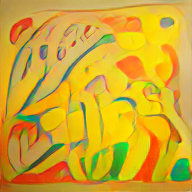

Ta da!!


In [9]:
#@title The magic is here{ display-mode: "form" }
#@markdown *Rubs my magic lamp

i = 1
try:
    with trange(args.total_iterations) as pbar:
        start = time.perf_counter()
        while i < args.total_iterations:
            pbar.update()
            train(i)
            if i == 10:
              end = time.perf_counter()
              print(f"It will take about {int((end - start) * args.total_iterations // (60 * 10))} minutes to complete all {args.total_iterations} iterations.")
            i += 1
except KeyboardInterrupt:
    pass
else:
  checkin(i, 0)

print("Ta da!!")